In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydensecrf.densecrf as dcrf

from pydensecrf.utils import create_pairwise_bilateral, create_pairwise_gaussian
from pydensecrf.utils import unary_from_labels, unary_from_softmax

import pickle
from scipy.misc import imread, imresize
%matplotlib inline

In [2]:
tmp = pickle.load(open('../../Segmentation/experiment_seg.pkl', 'rb'))

In [3]:
img = imresize(imread('../../frames/' + list(tmp.keys())[0]), (360, 640))
seg = tmp[list(tmp.keys())[0]]

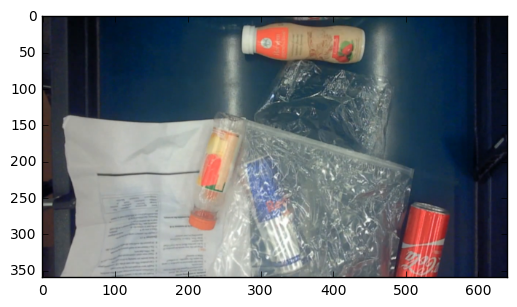

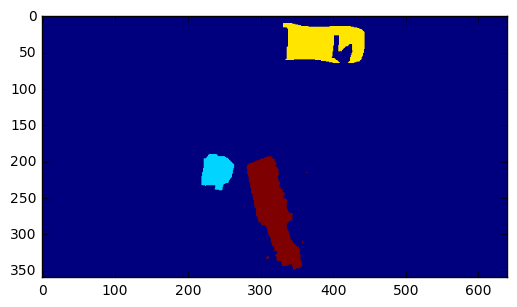

In [20]:
plt.imshow(img)
plt.show()
plt.imshow(seg)
plt.show()

In [ ]:
unary = np.ones((4, 360, 640)) / 4.

In [ ]:
for i in range(4):
    unary[i][seg == i] = 0.7
    unary[i][seg != i] = 0.1

In [31]:
unary = unary_from_labels(seg.astype('int32'), 4, 0.5, zero_unsure=False).astype('float32')

In [32]:
d = dcrf.DenseCRF(img.shape[0] * img.shape[1], 4)
d.setUnaryEnergy(unary)

In [33]:
feats = create_pairwise_gaussian(sdims=(5, 5), shape=img.shape[:2])

d.addPairwiseEnergy(feats, compat=3,
                    kernel=dcrf.DIAG_KERNEL,
                    normalization=dcrf.NORMALIZE_SYMMETRIC)

# This creates the color-dependent features --
# because the segmentation that we get from CNN are too coarse
# and we can use local color features to refine them
feats = create_pairwise_bilateral(sdims=(30, 30), schan=(10, 10, 10),
                                   img=img, chdim=2)

d.addPairwiseEnergy(feats, compat=10,
                     kernel=dcrf.DIAG_KERNEL,
                     normalization=dcrf.NORMALIZE_SYMMETRIC)

In [34]:
num_iter = 500
Q = np.array(d.inference(num_iter))

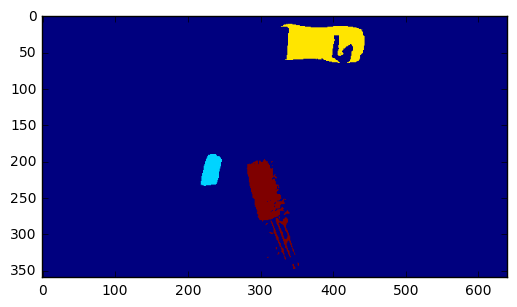

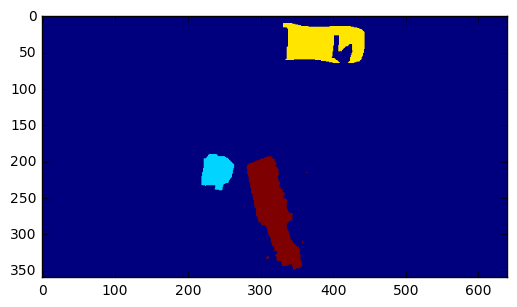

In [35]:
plt.imshow(Q.argmax(axis=0).reshape(360, 640))
plt.show()
plt.imshow(seg)
plt.show()